 <h1 align="center" style="color:Orange">
    Обробка та аналіз БМД.<br>
    Группа: БС-83<br>
    Шарган П.М.<br>
    Практикум Номер 4
</h1>

### **Перевірка даних на нормальність за допомогою критерію Шапіра-Уілка**




 

1.   Сгенеруйте набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20.






2.   Створіть функцію, що реалізує критерій Шапіро-Уілка та застосуйте її до кожної змінної набору данних.
Детальний опис роботи критерію та приклад його розрахунку (с. 606):
https://pdfs.semanticscholar.org/e4a7/42a4f0585b4e4069726f6628f4d4285a0827.pdf



3. Сгенеруйте пусту таблицю, в якій кількість рядків - це кількість змінних + 1. Кількість стовбчиків - 3. Назва стовпчиків - Variable, Statistics, Distribution.
Шаблон таблиці:
https://drive.google.com/file/d/1gRNsk9UDhl_6GGkJ04q0cBWBgsJvTgI4/view?usp=sharing

4. Занести в стовпчик Variable назви змінних.

5. Занести в стовпчик Distribution результати роботи криетрію Шапіро-Уілка. Для змінних, які розподілені за нормальним законом вносити "normal", в протилежному вигляді - "non-normal".

6. Розрахувати для всіх змінних, що розподілені за нормальним законом розрахувати середне значення та стандартне відхилення. Записати в таблицю. Форма запису: Середнє [стандартне відхилення].



7. Розрахувати для всіх змінних, що розподілені за розподілом відсутнім від нормального розрахувати медіану та інтерквартильний розмах. Записати в таблицю. Форма запису: Медіана [25%; 75%].

8. Зберегти таблицю в пдф форматі

 

### 1.   Сгенеруйте набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20.






In [45]:
import pandas as pd
import random
import numpy as np

In [46]:
df = pd.DataFrame(columns=['Height', 'Weight', 'Vo2Max', 'MaraphonPr(min)', 'WeeklyMilage', 'HRV'])

In [47]:
df['Height'] = np.random.normal(165,15,20) 

In [48]:
df['Weight'] = np.random.normal(65,9,20) 

In [49]:
df['WeeklyMilage'] = np.random.normal(35,10,20) 

In [50]:
df['Vo2Max'] = np.random.chisquare(4,20) 

In [51]:
df['MaraphonPr(min)'] = np.random.chisquare(150,20) 

In [52]:
df['HRV'] = np.random.chisquare(2,20) 

In [53]:
df

,Height,Weight,Vo2Max,MaraphonPr(min),WeeklyMilage,HRV
0,182.457862,63.286585,1.949757,155.839636,37.202150,0.265139
1,157.449474,64.599088,4.279895,137.541676,38.030116,3.703666
2,165.982396,57.947364,1.808108,129.532613,32.307504,0.125563
3,161.346472,83.233960,2.697552,157.618777,39.978286,0.494353
4,152.360431,61.825533,14.412837,166.161741,29.137053,0.150245
5,195.895834,73.480055,4.447863,143.945215,38.823913,3.337946
6,170.226200,44.264872,1.381011,145.484801,37.300585,2.322390
7,164.164407,75.466336,6.180284,151.977903,32.727421,0.763227
8,177.491968,62.781226,6.303087,160.508108,36.275946,1.493663
9,168.593760,54.967927,3.780536,217.791134,43.400552,6.245773


2.   Створіть функцію, що реалізує критерій Шапіро-Уілка та застосуйте її до кожної змінної набору данних.
Детальний опис роботи критерію та приклад його розрахунку (с. 606):
https://pdfs.semanticscholar.org/e4a7/42a4f0585b4e4069726f6628f4d4285a0827.pdf



In [54]:
def get_coeficients(obs_num, coef_file, dist_points_file):
    test_coefs = pd.read_excel(coef_file)[obs_num]
    w_tables =pd.read_excel(dist_points_file)
    
    # crutches for the god of crutches
    # due to table shift (1 - 3, 2 -4), i firstly get
    # the row with required n, then extract its value
    headers = list(w_tables.columns.values)
    required_row = w_tables.loc[w_tables[headers[0]] == 20]
    return test_coefs[:10], required_row[headers[-1]].iloc[0]/1000
    
def squared_mean(array):
    mean = np.mean(array)
    return sum([(num-mean)**2 for num in array])
    
def mirror_substruct(array, test_coefs):
    counter = 0
    for idx in range(len(array)//2):
        counter += test_coefs[idx]*(array.iloc[-idx-1] - array[idx])
    return counter


def shapiro_wilk(to_check):
    observations_num = len(to_check)
    middle = int(observations_num/2)
    test_coefs, w_table = get_coeficients(observations_num, 
                                        "Coeficients for the W test for normality.xlsx",
                                         "Рoints of the distribution of W.xlsx")
    
    sqrt_mean = squared_mean(to_check)
    b = mirror_substruct(to_check, test_coefs)
    result_coef = (b**2)/sqrt_mean
    
    return w_table, result_coef*100

def is_normal(to_check):
    w_table, result_coef = shapiro_wilk(to_check)
    print(result_coef)
    print(w_table)

    if ( result_coef > w_table):
        return True
    return False



In [55]:
table_st = pd.DataFrame(columns = ['Variable','Statistics','Distribution'])
table_st['Variable'] = df.columns
statistics_field = []
for i in range(6):
    if is_normal(df[df.columns[i]]):
        statistics_field.append(str(df[df.columns[i]].mean()) + '['+str(df[df.columns[i]].std())+']' )
    else:
        statistics_field.append(str(df[df.columns[i]].median()) + '['+str(df[df.columns[i]].quantile(0.25))+ ',' +str(df[df.columns[i]].quantile(0.75))+ ']' )
table_st['Statistics'] = statistics_field
                      
table_st['Distribution'] = ['normal' if is_normal(df[df.columns[i]]) else 'not normal' for i in range(6)]

 


12.847953252978279
0.905
0.28030411740159733
0.905
0.31162724517307244
0.905
1.8241028253279314
0.905
0.7926276895118792
0.905
1.033927765516849
0.905
12.847953252978279
0.905
0.28030411740159733
0.905
0.31162724517307244
0.905
1.8241028253279314
0.905
0.7926276895118792
0.905
1.033927765516849
0.905


In [56]:
table_st

,Variable,Statistics,Distribution
0,Height,162.95779093664711[14.264123374377926],normal
1,Weight,"63.03390568317778[59.39013394381516,69.9553983...",not normal
2,Vo2Max,"3.7999076101683738[2.2006486768166003,5.168740...",not normal
3,MaraphonPr(min),152.62929976490125[23.864562770854366],normal
4,WeeklyMilage,"36.73904779992682[31.514891080680293,40.046653...",not normal
5,HRV,1.9136798793698406[1.7186882830790853],normal


(0.0, 1.0, 0.0, 1.0)

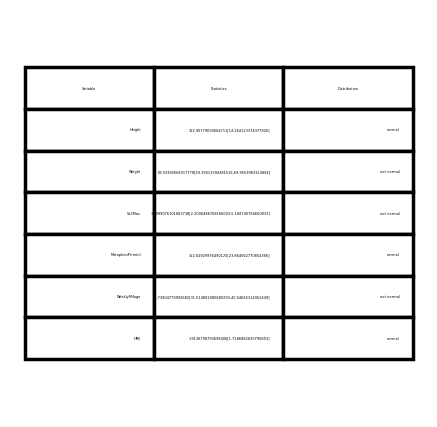

In [57]:
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf

fig = plt.figure(figsize=(2,2), dpi=250)
ax=fig.add_subplot(111)
cell_text = []
for row in range(len(table_st)):
    cell_text.append(table_st.iloc[row])

ax.table(cellText=cell_text, colLabels=table_st.columns, loc='center')
ax.axis('off')

In [58]:
pdf = matplotlib.backends.backend_pdf.PdfPages("output.pdf")
pdf.savefig(fig)
pdf.close()